In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default parameters
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rc('legend', fontsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.left'] = True

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size':15})

In [4]:
plabels =["$M_{*}$", "$\\alpha$", "$\\beta$"," $\\gamma$", "$\\sigma$", "$\\nu$"]

In [5]:
alpha_permutations = [1.5, 2.0, 2.5, 3.0]
colors = ['mediumpurple', 'grey', 'cornflowerblue', '']

### first the s0 permutations

In [6]:
fixed = [False, True, True, False, False, False]

alpha1_s0 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s0/alpha_permutations/mock_0/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha2_s0 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s0/alpha_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha3_s0 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s0/alpha_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha4_s0 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s0/alpha_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

datas_0 = [alpha1_s0.clean[:,0], alpha2_s0.clean[:,0],  alpha3_s0.clean[:,0], alpha4_s0.clean[:,0]]

datas_0_sigma = [alpha1_s0.clean[:,1], alpha2_s0.clean[:,1],  alpha3_s0.clean[:,1], alpha4_s0.clean[:,1]]

### now the s15 permutations

In [7]:
fixed = [False, True, False, False, True, False]

alpha1_s15 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15/alpha_permutations/mock_0/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha2_s15 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15/alpha_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha3_s15 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15/alpha_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha4_s15 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15/alpha_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

datas_15 = [alpha1_s15.clean[:,0], alpha2_s15.clean[:,0],  alpha3_s15.clean[:,0], alpha4_s15.clean[:,0]]

datas_15_sigma = [alpha1_s15.clean[:,1], alpha2_s15.clean[:,1],  alpha3_s15.clean[:,1], alpha4_s15.clean[:,1]]

### now the s30 permutations

In [8]:
fixed = [False, True, True, False, False, False]

alpha1_s30 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s30/alpha_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha2_s30 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s30/alpha_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha3_s30 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s30/alpha_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha4_s30 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s30/alpha_permutations/mock_4/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

datas_30 = [alpha1_s30.clean[:,0], alpha2_s30.clean[:,0],  alpha3_s30.clean[:,0], alpha4_s30.clean[:,0]]

datas_30_sigma = [alpha1_s30.clean[:,1], alpha2_s30.clean[:,1],  alpha3_s30.clean[:,1], alpha4_s30.clean[:,1]]

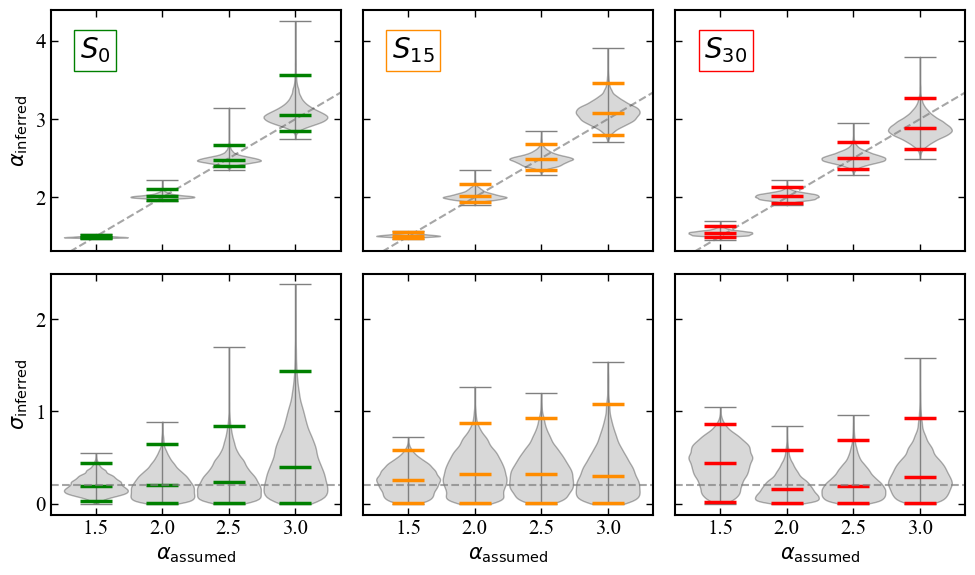

In [9]:
fig, axs = plt.subplots(ncols=3, nrows=2, sharex=True, sharey="row", figsize=(10, 6))

qaunts = [[0.01, 0.5, 0.99], [0.01, 0.5, 0.99], [0.01, 0.5, 0.99], [0.01, 0.5, 0.99]]

violins_s0 = axs[0, 0].violinplot(datas_0, positions=alpha_permutations, widths=0.48, showmedians=False, showextrema=True, quantiles = qaunts)
violins_s15 = axs[0, 1].violinplot(datas_15, positions=alpha_permutations, widths=0.48, showmedians=False, showextrema=True, quantiles = qaunts)
violins_s30 = axs[0, 2].violinplot(datas_30, positions=alpha_permutations, widths=0.48, showmedians=False, showextrema=True, quantiles = qaunts)

violins_s0_sigma = axs[1, 0].violinplot(datas_0_sigma, positions=alpha_permutations, widths=0.48, showmedians=False, showextrema=True, quantiles = qaunts)
violins_s15_sigma = axs[1, 1].violinplot(datas_15_sigma, positions=alpha_permutations, widths=0.48, showmedians=False, showextrema=True, quantiles = qaunts)
violins_s30_sigma = axs[1, 2].violinplot(datas_30_sigma, positions=alpha_permutations, widths=0.48, showmedians=False, showextrema=True, quantiles = qaunts)

violinz = [violins_s0, violins_s0_sigma, violins_s15, violins_s15_sigma, violins_s30, violins_s30_sigma]
colors = ["green", "green", "darkorange", "darkorange", "red", "red"]

for violin in violinz:
    for pc in violin['bodies']:
        pc.set_facecolor('grey')
        pc.set_edgecolor('black')

for ind, violin in enumerate(violinz):
    vp = violin['cquantiles']
    vp.set_edgecolor(colors[ind])
    vp.set_linewidth(2.5)

for partname in ('cmins', 'cmaxes', 'cbars'):
    for ind, violin in enumerate(violinz):
        vp = violin[partname]
        vp.set_edgecolor("grey")
        vp.set_linewidth(1)

axs[0, 0].set_xticks(alpha_permutations, ["1.5", "2.0", "2.5", "3.0"])

xpoints = ypoints = axs[0, 0].get_xlim()
axs[0, 0].plot(xpoints, ypoints, ls='--', color='grey', scalex=False, scaley=False, zorder=0, alpha=0.7)
axs[0, 1].plot(xpoints, ypoints, ls='--', color='grey', scalex=False, scaley=False, zorder=0, alpha=0.7)
axs[0, 2].plot(xpoints, ypoints, ls='--', color='grey', scalex=False, scaley=False, zorder=0, alpha=0.7)

axs[1, 0].axhline(0.2, ls='--', color='grey', alpha=0.7)
axs[1, 1].axhline(0.2, ls='--', color='grey', alpha=0.7)
axs[1, 2].axhline(0.2, ls='--', color='grey', alpha=0.7)


axs[0, 0].set_ylabel('$\\alpha_{\mathrm{inferred}}$', fontsize=15)
axs[1, 0].set_ylabel('$\\sigma_{\mathrm{inferred}}$', fontsize=15)

axs[1, 0].set_xlabel("$\\alpha_{\mathrm{assumed}}$", fontsize=15)
axs[1, 1].set_xlabel("$\\alpha_{\mathrm{assumed}}$", fontsize=15)
axs[1, 2].set_xlabel("$\\alpha_{\mathrm{assumed}}$", fontsize=15)

axs[0, 0].text(0.1, 0.8, "$S_0$", transform=axs[0, 0].transAxes, fontsize=20, fontweight='bold', bbox=dict(facecolor='white', alpha=1, edgecolor="green"))
axs[0, 1].text(0.1, 0.8, "$S_{15}$", transform=axs[0, 1].transAxes, fontsize=20, fontweight='bold', bbox=dict(facecolor='white', alpha=1, edgecolor="darkorange"))
axs[0, 2].text(0.1, 0.8, "$S_{30}$", transform=axs[0, 2].transAxes, fontsize=20, fontweight='bold', bbox=dict(facecolor='white', alpha=1, edgecolor="red"))

plt.tight_layout()
plt.savefig("../../../paper_1/figures/feature_recovery/alpha_permuations.pdf", bbox_inches="tight")
plt.show()